In [44]:
import pandas as pd
import numpy as np
import datetime

In [45]:
data_filepath = r"./src/vehicle_data/bat_intermediate_data.csv"
data = pd.read_csv(data_filepath)
data = data.drop(["Kilometers", "VIN"], axis=1)
data.head(5)

,Auction Date,Make,Model,Year,Miles,Sale_Status,Final Bid Price,manual_trans_bool,paint_str,carfax_bool
0,3/16/22,ACOMA,Era1970s,1975,745.0,1,10100.0,0,white,0
1,12/10/20,ACOMA,Era1970s,1975,745.0,1,8000.0,0,white,0
2,3/16/22,ACOMA,Era1970s,1975,745.0,1,10100.0,0,white,0
3,12/10/20,ACOMA,Era1970s,1975,745.0,1,8000.0,0,white,0
4,7/29/20,Era1970s,OriginFrench,1975,745.0,1,9100.0,0,white,0


In [46]:
# data.head()
# import datetime
# # year = data['Auction Date'][0].date.year
# t = "11/02/22"
# formatted_data = datetime.datetime.strptime(t, '%m/%d/%y')
# formatted_data.year
# formatted_data.month
# formatted_data.day

## Convert dates into separate features

In [47]:
year, month, day = [], [], []
# time_lst = ['year', 'month', 'day']
t_format = '%m/%d/%y'

for time in data["Auction Date"]:
    year.append(datetime.datetime.strptime(time, t_format).year)
    month.append(datetime.datetime.strptime(time, t_format).month)
    day.append(datetime.datetime.strptime(time, t_format).day)

    
data['auction_year'] = pd.Series(year)
data['auction_month'] = pd.Series(month)
data['auction_day'] = pd.Series(day)

data = data.drop("Auction Date", axis=1)

## Remove Model Year Outliers

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


print("Model years > 2022:", data.Year[data["Year"] > 2022].count())
print("Model years < 1900:",data.Year[data["Year"] < 1900].count())

adj_model_year = []
for year in data.Year:
    if year > 2022 or year < 1900:
        adj_model_year.append(None)
    else:
        adj_model_year.append(year)
        
data['adj_model_year'] = pd.Series(adj_model_year)

data = data.drop('Year', axis=1)

data.head()

Model years > 2022: 94
Model years < 1900: 31


,Make,Model,Miles,Sale_Status,Final Bid Price,manual_trans_bool,paint_str,carfax_bool,auction_year,auction_month,auction_day,adj_model_year
0,ACOMA,Era1970s,745.0,1,10100.0,0,white,0,2022,3,16,1975.0
1,ACOMA,Era1970s,745.0,1,8000.0,0,white,0,2020,12,10,1975.0
2,ACOMA,Era1970s,745.0,1,10100.0,0,white,0,2022,3,16,1975.0
3,ACOMA,Era1970s,745.0,1,8000.0,0,white,0,2020,12,10,1975.0
4,Era1970s,OriginFrench,745.0,1,9100.0,0,white,0,2020,7,29,1975.0


(array([1.25184220e-05, 6.48681867e-05, 4.22212233e-04, 6.66890481e-04,
        4.53166876e-03, 1.73823980e-02, 1.22726057e-02, 1.89028172e-02,
        2.05791477e-02, 7.13208642e-03]),
 array([1900. , 1912.2, 1924.4, 1936.6, 1948.8, 1961. , 1973.2, 1985.4,
        1997.6, 2009.8, 2022. ]),
 <BarContainer object of 10 artists>)

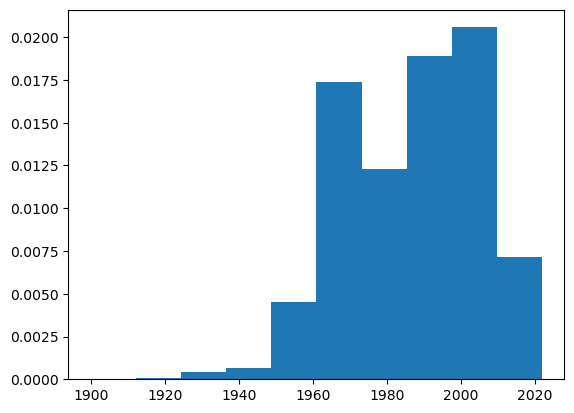

In [49]:
plt.hist(data.adj_model_year, density=True) 
# plt.plot(data.adj_model_year)

## Convert "NaN" to np.nan

In [50]:
data = data.fillna(np.nan)
print('Before:\n', data.isna().sum())
data.paint_str = data.paint_str.fillna("None")

# Remove mileage outliers
data[data.Miles > 1000000].count()
# print(data.Miles.count(), data.count())
data = data[data.Miles < 1000000]

# drop rest of nans
data = data.dropna()

print('After:\n', data.isna().sum())

Before:
 Make                     0
Model                    0
Miles                 2087
Sale_Status              0
Final Bid Price          0
manual_trans_bool        0
paint_str            11701
carfax_bool              0
auction_year             0
auction_month            0
auction_day              0
adj_model_year         125
dtype: int64
After:
 Make                 0
Model                0
Miles                0
Sale_Status          0
Final Bid Price      0
manual_trans_bool    0
paint_str            0
carfax_bool          0
auction_year         0
auction_month        0
auction_day          0
adj_model_year       0
dtype: int64


In [51]:
data.head()

,Make,Model,Miles,Sale_Status,Final Bid Price,manual_trans_bool,paint_str,carfax_bool,auction_year,auction_month,auction_day,adj_model_year
0,ACOMA,Era1970s,745.0,1,10100.0,0,white,0,2022,3,16,1975.0
1,ACOMA,Era1970s,745.0,1,8000.0,0,white,0,2020,12,10,1975.0
2,ACOMA,Era1970s,745.0,1,10100.0,0,white,0,2022,3,16,1975.0
3,ACOMA,Era1970s,745.0,1,8000.0,0,white,0,2020,12,10,1975.0
4,Era1970s,OriginFrench,745.0,1,9100.0,0,white,0,2020,7,29,1975.0


## Removing Mileage Outliers

In [52]:
# data[data.Miles > 1000000].count()
# print(data.Miles.count(), data.count())
# data = data[data.Miles < 1000000]
# data.Miles.count()

In [53]:
# plt.hist(t, density=True) 
# plt.plot(t)
# data[data.paint_str.isna()]
# data = data.paint_str.fillna(np.nan)
# data.paint_str[72146:72147].dtype
data.paint_str.dtype

dtype('O')

## Write to CSV

In [54]:
data.to_csv("./src/vehicle_data/bat_training_data.csv", header=True, index=False)

In [55]:
data.head()

,Make,Model,Miles,Sale_Status,Final Bid Price,manual_trans_bool,paint_str,carfax_bool,auction_year,auction_month,auction_day,adj_model_year
0,ACOMA,Era1970s,745.0,1,10100.0,0,white,0,2022,3,16,1975.0
1,ACOMA,Era1970s,745.0,1,8000.0,0,white,0,2020,12,10,1975.0
2,ACOMA,Era1970s,745.0,1,10100.0,0,white,0,2022,3,16,1975.0
3,ACOMA,Era1970s,745.0,1,8000.0,0,white,0,2020,12,10,1975.0
4,Era1970s,OriginFrench,745.0,1,9100.0,0,white,0,2020,7,29,1975.0
